# Thompson Sampling

Thompson sampling mirip dengan UCB, hanya saja pada pengambilan keputusan mesin mana yang harus di eksplor dan dieksploitasi menggunakan probabilitas, dibanding strict mengambil confidence tertinggi seperti di UCB

##Beta distribution



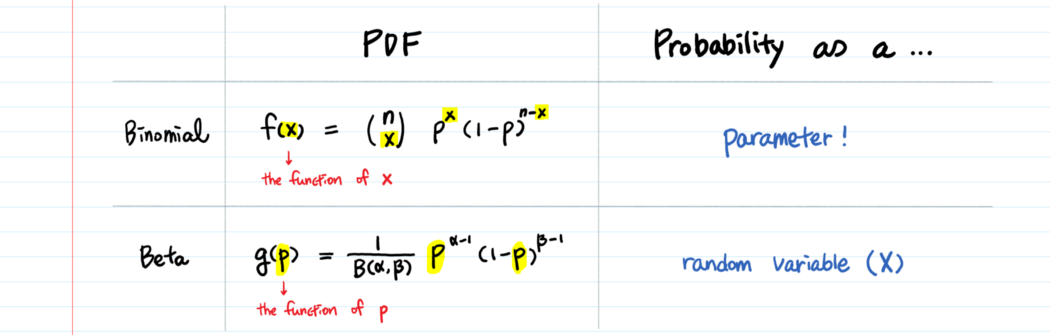

Beta distribution mirip dengan binomial distribution, hanya saja pada binomial distribution merupakan diskrit sedangkan beta distribution adalah kontinu

Beta distribution merupakan PDF

random variable dari beta distribution adalah probabilitas, sedangkan random variable dari binomial distribution adalah jumlah menang yang diinginkan (x)

Beta distribution dirumuskan sebagai berikut :
	
  ${\displaystyle {\frac {x^{\alpha -1}(1-x)^{\beta -1}}{\mathrm {B} (\alpha ,\beta )}}\!}\!$, B adalah 

  bisa kita lihat bahwa α-1 mirip dengan x (jumlah menang/reward), sedangkan β-1 mirip denga n-x (jumlah tidak menang). Untuk 𝚩(α,β) berbentuk sebagai berikut:

  $ {\displaystyle \mathrm {B} (\alpha ,\beta )={\frac {\Gamma (\alpha )\Gamma (\beta )}{\Gamma (\alpha +\beta )}}}$

Beta distribution digunakan untuk menentukan letak rata=rata distribusi benda yang diamati (multi armed bandit dalam contoh UCB) dengan probabilitas tertinggi

Berikut adalah perilaku distribusi beta. semakin besar nilai α dan β maka semakin tipis grafiknya

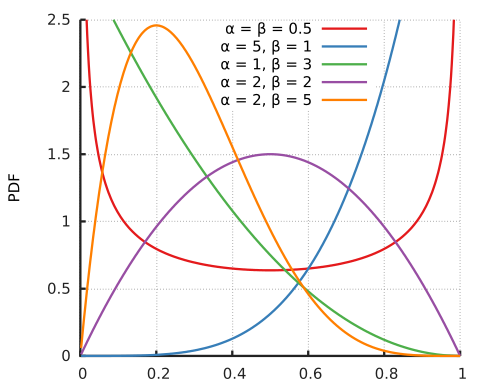

##Thompson sampling

Cara kerja thompson sampling adalah sebagai berikut :
1. Hitung jumlah sukses dan jumlah gagal tiap benda i yang ingin di eksplor hingga saat ini.
2. Cari nilai probabilitas tertinggi secara random yang didapat dari distribusi Beta $\mathrm {B} (jumlah sukses+1,jumlah gagal+1)$ untuk tiap benda i. Hasil dari beta ini digunakanakan sebagai asumsi bahwa pada titik hasil beta itulah letak dimana rata-rata distribusi benda asli berada (karena dianggap bahwa tiap benda memiliki distribusinya masing-masing).Alasan mengapa harus +1 untuk sukses dan gagal, karena nilai α dan β pada distribusi beta tidak mengizinkan nilai 0, sehingga karena pada saat awal jumlah sukses dan gagal sudah pasti 0, maka harus ada +1
3. Ulangi dari awal

Semakin banyak jumlah percobaan yang dilakukan pada suatu benda i maka distribusi beta akan lebih mengerucut/converges, sehingga semakin yakin nilai rata-rata distribusi benda i berada di distribusi beta tersebut.

contoh thompson sampling
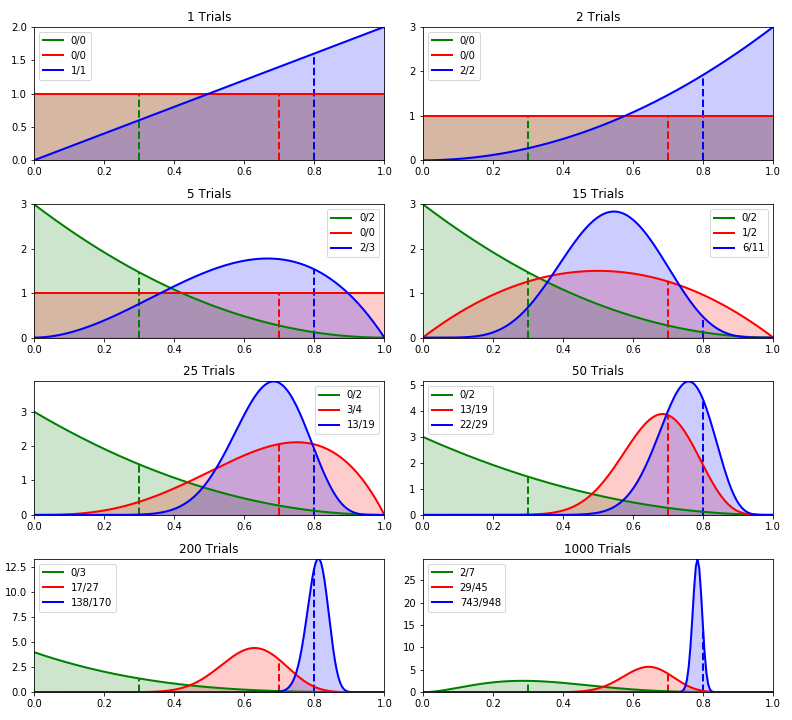

Pada gambar diatas garis titik-titik merupakan letak rata-rata asli distribusi tiap benda. benda biru adalah 0.8, merah 0.7 dan hijau 0.3, seharunya semakin banyak eksplorasi maka semakin menipis distribusi beta dan rata-rata distribusi beta mendekati rata-rata distribusi asli benda
1. Pada saat inisialisasi, semua benda i memiliki jumlah sukses dan gagal 0, oleh karena itu nilai α dan β bernilai 1 (karena α=jumlah sukses+1 dan β=jumlah gagal + 1). Sehingga hasil distribusi beta tiap bendanya adalah data
2. Pada percobaan pertama dipilih nilai random dari distribusi tersebut, dan didapatkanlah bahwa benda biru memiliki probabilitas rata-rata distribusi asli benda terbesar. Kemudian kita lakukan eksplorasi pada benda biru riil, ternyata sukses pada percobaan tersebut sehingga jumlah sukses bertambah 1. Hasil ini dapat dilihat bahwa distribusi semakin meningkat ke arah kanan (semakin mungkin untuk dipilih pada eksplorasi selanjutnya)
3. Pada percobaan 2 juga didapatkan bahwa probabilitas rata-rata distribusi asli benda terbesar, sehingga dipilih lagi biru, dan biru sukses sehingga semakin meningkat ke kanan distribusi beta dari biru
4. percobaan mendapatkan probabilitas rata-rata distribusi asli benda terbesar dan memilih benda tersebut untuk dieksplorai terus dilakukan. Sampai pada percobaan 4 benda hijau dipilih 2 kali dan gagal semua, sehingga distribusi betanya terlihat menaik ke kiri. Pada percobaan 5 ternyata benda biru dipilih lagi, namun gagal yang didapatkannya, sehingga grafik yang tadinya selalu menaik ke kanan menjadi bentuk parabola
5. Percobaan terus dilakukan dan sering kali biru dipilih, sehingga distribusi betanya semakin menipis, sehingga semakin yakin bahwa rata-rata distribusi asli biru berada pada distribusi beta tersebut. Terlihat bahwa hanya distribusi beta biru yang semakin menipis sedangkan distribusi lain masih gendut, namun ini tidak masalah karena kita hanya mencari benda terbaik yang memberikan terbanyak, dan kita bisa lihat bahwa karena biru selalu dipilih dan sering kali memberikan reward, sehingga kemungkinan rata-rata distribusi benda biru yang terbesar, sehingga kita tidak perlu mengetahui rata-rata distribusi benda lain.

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")
dataset

## Implementing Thompson Sampling

In [ ]:
import random 
N = dataset.shape[0]
n = dataset.shape[1]
ads_selected = [0] * n
reward = [0] * n
hist=[]
select=0
for i in range(0,N):
  max=-1
  for j in range(0,n):
    beta=random.betavariate(reward[j]+1,ads_selected[j]-reward[j]+1)
    if beta > max:
      select=j
      max=beta
  ads_selected[select]+=1
  hist.append(select)
  reward[select]+=dataset.iloc[i,select]

print(ads_selected)
print(reward)

[173, 157, 52, 34, 9242, 25, 50, 127, 93, 47]
[31, 27, 5, 1, 2500, 0, 4, 21, 12, 4]


## Visualising the results - Histogram

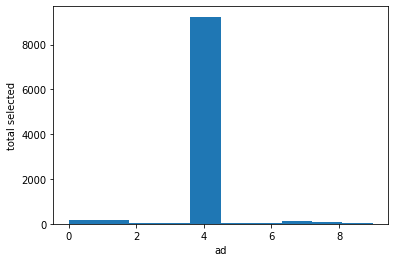

In [ ]:
plt.hist(hist)
plt.xlabel("ad")
plt.ylabel("total selected")
plt.show()